In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
cwd = '/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data'
for dirname, _, filenames in os.walk(cwd):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/test.csv
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/train.csv
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/sample_submission.csv
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/ohe_city_tier.sav
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/le_ADDRESS_classes.sav
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/le_city_tier.sav
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/le_ADDRESS.sav
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/ohe_POSTED_BY.sav
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/le_city_tier_classes.sav
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/le_POSTED_BY.sav
/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/TextEncoding/le_BHK_OR_RK_classes.sav
/Users/lukemcevoy/Develop/stevens/f21

In [3]:
data = pd.read_csv('/Users/lukemcevoy/Develop/stevens/f21/dataMining/final/data/train.csv')
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [5]:
data['ADDRESS'] = data['ADDRESS'].str.split(',').apply(lambda x: x[-1])

In [6]:
data['ADDRESS'].value_counts(ascending=False).head(50)

Bangalore        4340
Lalitpur         2993
Mumbai           2023
Pune             1991
Noida            1767
Kolkata          1709
Maharashtra      1579
Chennai          1255
Ghaziabad        1087
Jaipur            962
Chandigarh        696
Faridabad         649
Mohali            556
Vadodara          510
Gurgaon           430
Surat             423
Nagpur            336
Lucknow           327
Indore            306
Bhubaneswar       235
Bhopal            218
Kochi             205
Visakhapatnam     179
Bhiwadi           161
Goa               149
Coimbatore        149
Dehradun          131
Ranchi            124
Mangalore         122
Gandhinagar       118
Sonipat           117
Secunderabad      109
Palghar           107
Kanpur             92
Raipur             89
Guwahati           89
Jamshedpur         86
Siliguri           83
Rajkot             83
Agra               83
Patna              82
Panchkula          82
Vijayawada         80
Aurangabad         66
Jamnagar           66
Raigad    

In [7]:
def map_city(city):
    if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune', 'Maharashtra']:
        return 'tier1'
    elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 
                  'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 
                  'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Bhilai', 'Durgapur', 'Dindigul', 'Erode', 
                  'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati', 
                  'Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 
                  'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 
                  'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad', 
                  'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 
                  'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Ratlam', 'Salem', 'Sangli', 'Shimla', 'Siliguri', 
                  'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 
                  'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 
                  'Vellore', 'Warangal']:
        return 'tier2'
    else:
        return 'tier3'
    
data['city_tier'] = data['ADDRESS'].apply(map_city)

In [8]:
%matplotlib inline
data['area'] = np.log(data['SQUARE_FT'])
data['PRICE_IN_LACS'] = np.log(data['TARGET(PRICE_IN_LACS)'])

Text(0, 0.5, 'PRICE_IN_LACS')

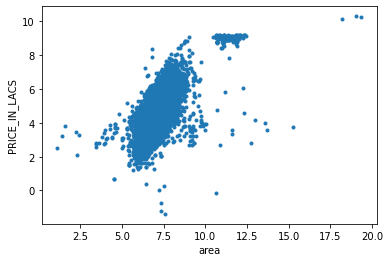

In [9]:
plt.plot(data['area'], data['PRICE_IN_LACS'],'.')
plt.xlabel('area')
plt.ylabel('PRICE_IN_LACS')

In [10]:
print(data['PRICE_IN_LACS'])

0        4.007333
1        3.931826
2        3.761200
3        4.135167
4        4.102643
           ...   
29446    3.806662
29447    2.772589
29448    3.299534
29449    4.204693
29450    3.325036
Name: PRICE_IN_LACS, Length: 29451, dtype: float64


Text(0, 0.5, 'PRICE_IN_LACS')

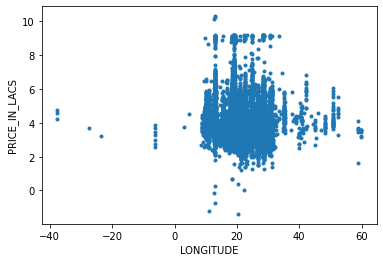

In [11]:
%matplotlib inline

plt.plot(data['LONGITUDE'], data['PRICE_IN_LACS'],'.')
plt.xlabel('LONGITUDE')
plt.ylabel('PRICE_IN_LACS')

Text(0, 0.5, 'PRICE_IN_LACS')

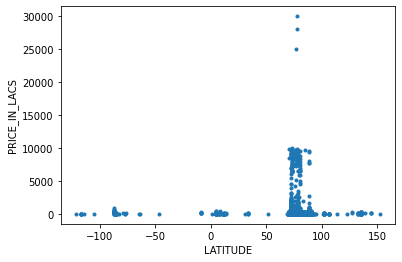

In [12]:
%matplotlib inline

plt.plot(data['LATITUDE'], data['TARGET(PRICE_IN_LACS)'],'.')
plt.xlabel('LATITUDE')
plt.ylabel('PRICE_IN_LACS')

In [13]:
import random
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import axes
from matplotlib.font_manager import FontProperties

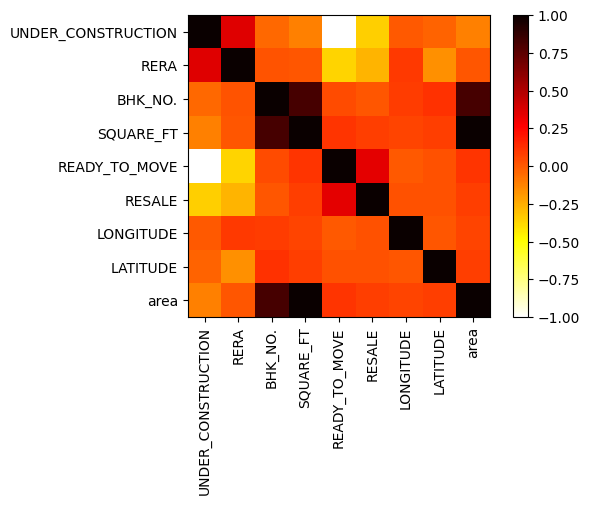

In [14]:
d = [[1,0.36,-0.04,-0.11, -1,-0.35,0, -0.03,-0.11],
       [0.36,1,0.02,0.01,-0.36,-0.27,0.1,-0.16,0.01],
       [-0.04,0.02,1,0.82,0.04,0.01,0.09,0.12,0.82],
       [-0.11,0.01,0.82,1,0.11,0.08,0.07,0.08,1],
       [-1,-0.36, 0.04, 0.11,1,0.35, 0,0.03, 0.11],
       [-0.35,-0.27, 0.01,0.08,0.35, 1, 0.03,0.03,0.08],
       [0,0.1,0.09,0.07,0,0.03,1,0.01,0.07],
       [-0.03,-0.16,0.12,0.08,0.03,0.03,0.01,1,0.08],
       [-0.11,0.01,0.82,1,0.11,0.08,0.07,0.08,1]]
xLabel = ['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE', 'area']
yLabel = ['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE', 'area']

d = np.array(d)
plt.figure(dpi=100)
plt.imshow(d, cmap=plt.cm.hot_r)
plt.xticks(ticks=np.arange(9),labels=xLabel,rotation=90)
plt.yticks(ticks=np.arange(9),labels=yLabel)
plt.colorbar()

In [15]:
categorical_features = ['POSTED_BY', 'BHK_OR_RK', 'city_tier', 'ADDRESS']
numerical_features = ['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE', 'area']

In [16]:
df = data.groupby(['ADDRESS'])['TARGET(PRICE_IN_LACS)'].describe()[['mean', 'count']]
df = df[df['count']>20]

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import joblib

In [18]:
df = data.copy()
path = cwd
for i, feature in enumerate(categorical_features):
    le = LabelEncoder()
    ohe = OneHotEncoder(sparse=False)
    if not os.path.exists(os.path.join(path, "TextEncoding")):
        os.makedirs(os.path.join(path, "TextEncoding"))
    le.fit(df[feature])
    joblib.dump(le, open(os.path.join(path, "TextEncoding/le_{}.sav".format(feature)), 'wb'))
    df[feature] = le.transform(df[feature])
    columns = list(map(lambda x: feature+' '+str(x), list(le.classes_)))[1:]
    joblib.dump(columns, 
                open(os.path.join(path, "TextEncoding/le_{}_classes.sav".format(feature)), 'wb'))
    columns = joblib.load(
        open(os.path.join(path, "TextEncoding/le_{}_classes.sav".format(feature)), 'rb'))
    if len(le.classes_)>2 and feature!='ADDRESS':
        ohe.fit(df[[feature]])
        joblib.dump(ohe, 
                    open(os.path.join(path, "TextEncoding/ohe_{}.sav".format(feature)), 'wb'))
        tempData = ohe.transform(df[[feature]])[:, 1:]
        tempData = pd.DataFrame(tempData, columns=columns)
    else:
        tempData = df[[feature]]
    if i==0:
        encodedData = pd.DataFrame(data=tempData, columns=tempData.columns.values.tolist())
    else:
        encodedData = pd.concat([encodedData, tempData], axis=1)

In [19]:
df = df[numerical_features+['TARGET(PRICE_IN_LACS)', 'PRICE_IN_LACS']]
df = pd.concat([df, encodedData], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UNDER_CONSTRUCTION     29451 non-null  int64  
 1   RERA                   29451 non-null  int64  
 2   BHK_NO.                29451 non-null  int64  
 3   SQUARE_FT              29451 non-null  float64
 4   READY_TO_MOVE          29451 non-null  int64  
 5   RESALE                 29451 non-null  int64  
 6   LONGITUDE              29451 non-null  float64
 7   LATITUDE               29451 non-null  float64
 8   area                   29451 non-null  float64
 9   TARGET(PRICE_IN_LACS)  29451 non-null  float64
 10  PRICE_IN_LACS          29451 non-null  float64
 11  POSTED_BY Dealer       29451 non-null  float64
 12  POSTED_BY Owner        29451 non-null  float64
 13  BHK_OR_RK              29451 non-null  int64  
 14  city_tier tier2        29451 non-null  float64
 15  ci

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics, preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from xgboost import XGBRegressor

In [21]:
train_data = df.copy()
feature_cols = [feature for feature in train_data.columns if feature not in(['READY_TO_MOVE', 'ADDRESS', 'TARGET(PRICE_IN_LACS)', 
                                                                             'SQUARE_FT', 'PRICE_IN_LACS'])]


In [22]:
feature_cols

['UNDER_CONSTRUCTION',
 'RERA',
 'BHK_NO.',
 'RESALE',
 'LONGITUDE',
 'LATITUDE',
 'area',
 'POSTED_BY Dealer',
 'POSTED_BY Owner',
 'BHK_OR_RK',
 'city_tier tier2',
 'city_tier tier3']

In [23]:
X = train_data[feature_cols]
y = train_data['PRICE_IN_LACS']

validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

y1 = train_data['TARGET(PRICE_IN_LACS)']
validation_size = 0.2
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

In [24]:
y_test.head(20)

22796    3.871201
20812    2.197225
10106    4.012773
28692    4.787492
2717     3.332205
14283    4.442651
28478    4.317488
9295     3.555348
3469     3.663562
27661    3.417727
22304    4.007333
17551    4.174387
2721     6.396930
219      5.075174
2195     3.496508
10245    4.174387
4435     3.860730
28505    3.688879
7691     3.401197
7004     3.970292
Name: PRICE_IN_LACS, dtype: float64

In [25]:
X_test.head(20)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,RESALE,LONGITUDE,LATITUDE,area,POSTED_BY Dealer,POSTED_BY Owner,BHK_OR_RK,city_tier tier2,city_tier tier3
22796,0,0,3,1,28.629811,77.434197,7.453201,1.0,0.0,0,1.0,0.0
20812,0,0,1,1,21.000000,79.000000,6.216833,0.0,1.0,0,1.0,0.0
10106,1,1,2,0,13.113890,77.598330,6.801491,1.0,0.0,0,0.0,0.0
28692,0,1,3,0,13.030600,77.648500,7.256249,1.0,0.0,0,0.0,0.0
2717,0,1,1,1,12.951610,80.140970,6.429748,0.0,1.0,0,0.0,0.0
14283,0,0,2,1,18.558319,73.775880,7.089983,0.0,1.0,0,0.0,0.0
28478,0,0,2,1,28.568096,77.390253,7.034529,0.0,1.0,0,1.0,0.0
9295,0,0,3,1,21.152819,79.069531,7.244228,0.0,1.0,0,0.0,1.0
3469,1,1,2,1,21.094632,79.074805,7.047312,0.0,1.0,0,1.0,0.0
27661,0,0,2,1,22.541110,88.337780,6.824439,1.0,0.0,0,0.0,0.0


In [26]:
# XGBRegressor

In [27]:
model = XGBRegressor( 
    n_estimators = 500,
    learning_rate=0.02, 
    seed=7)

In [28]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(model, X_test, y_test, cv=30, return_times=True)

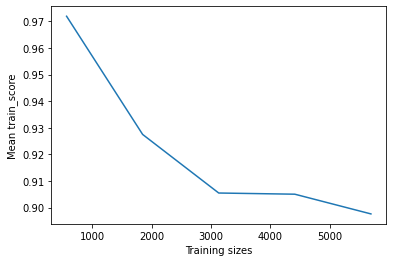

In [29]:
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.xlabel('Training sizes') 
plt.ylabel('Mean train_score')
plt.show()

In [30]:
model = model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    verbose=False)

In [31]:
model.score(X_test, y_test)

0.8425897270434302

In [32]:
# Support Vector Machine

In [33]:
from sklearn import svm
regr = svm.SVR()
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.575084467803466

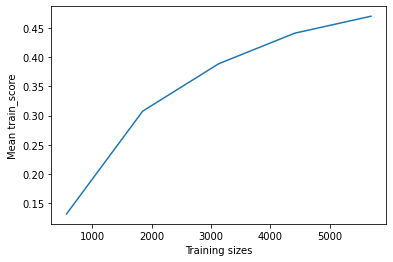

In [34]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(regr, X_test, y_test, cv=30, return_times=True)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.xlabel('Training sizes') 
plt.ylabel('Mean train_score')
plt.show()

In [35]:
# Decision Tree

In [36]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7278864716523665

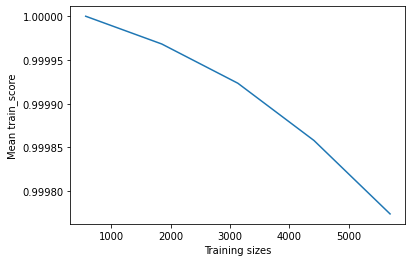

In [37]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(clf, X_test, y_test, cv=30, return_times=True)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.xlabel('Training sizes') 
plt.ylabel('Mean train_score')
plt.show()

In [38]:
# Neural Network (MLPRegressor)

In [39]:
from sklearn.neural_network import MLPRegressor
nnregr = MLPRegressor(random_state=1, max_iter=100000)
nnregr.fit(X_train, y_train)
nnregr.score(X_test, y_test)

0.6930506508632484

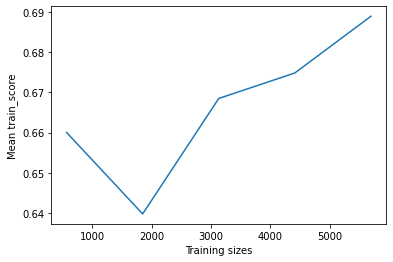

In [40]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(nnregr, X_test, y_test, cv=30, return_times=True)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.xlabel('Training sizes') 
plt.ylabel('Mean train_score')
plt.show()

In [41]:
from sklearn import linear_model
reg = linear_model.Lars(n_nonzero_coefs=12, normalize=False)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.5890383006435391

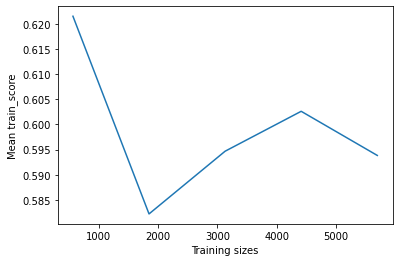

In [42]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(reg, X_test, y_test, cv=30, return_times=True)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.xlabel('Training sizes') 
plt.ylabel('Mean train_score')
plt.show()

In [43]:
# Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10000, random_state=0)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.8502954380903031

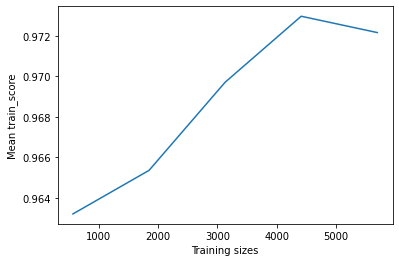

In [45]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(regr, X_test, y_test, cv=30, return_times=True)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.xlabel('Training sizes') 
plt.ylabel('Mean train_score')
plt.show()

In [46]:
# Linear Model (Baysian Ridge)

In [47]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.5890179004546502

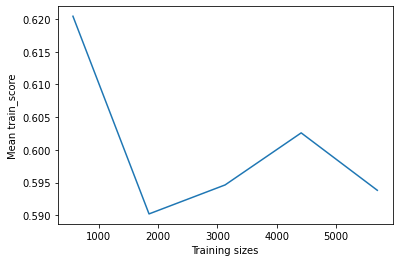

In [48]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(reg, X_test, y_test, cv=30, return_times=True)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.xlabel('Training sizes') 
plt.ylabel('Mean train_score')
plt.show()

In [49]:
# K Nearest Neighbor

In [50]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.7937267071315093

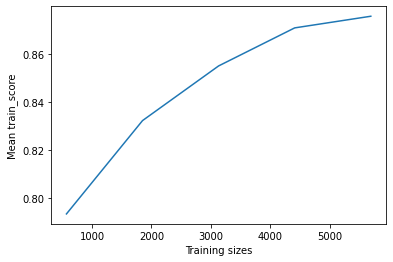

In [51]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(neigh, X_test, y_test, cv=30, return_times=True)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.xlabel('Training sizes') 
plt.ylabel('Mean train_score')
plt.show()

In [52]:
# Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.5890383006435393

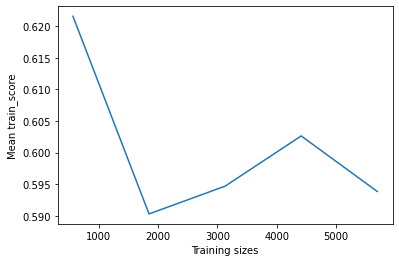

In [54]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(reg, X_test, y_test, cv=30, return_times=True)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.xlabel('Training sizes') 
plt.ylabel('Mean train_score')
plt.show()